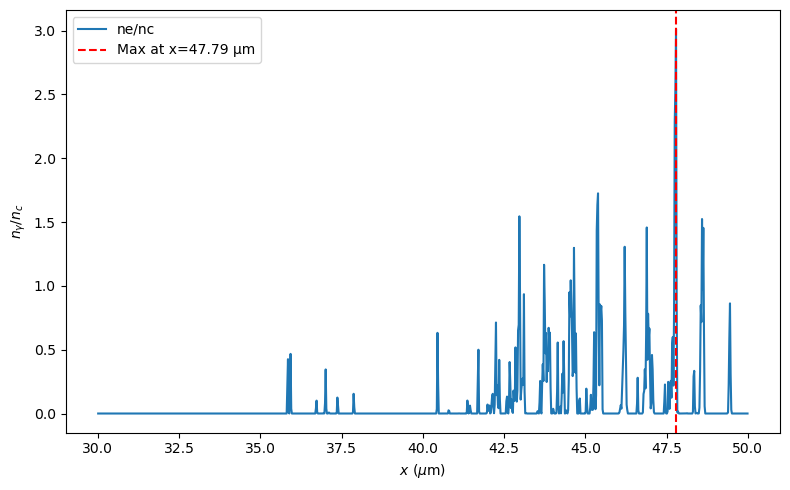

Max ne/nc = 3.010e+00 at x = 47.79 μm


In [3]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# ===== 文件路径设置 =====
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
file_index = 18
file_path = os.path.join(base_path, f'density{file_index:04d}.sdf')

# ===== 读取数据 =====
den_crit = 0.17419597124e28
data = sh.getdata(file_path)
ne = data.Derived_Number_Density_Photon.data / den_crit

x = data.Grid_Grid_mid.data[0] / 1e-6  # μm
y = data.Grid_Grid_mid.data[1] / 1e-6
z = data.Grid_Grid_mid.data[2] / 1e-6

# ===== 找到 y=0 和 z=0 最接近的位置索引 =====
y0_index = np.argmin(np.abs(y - 0))
z0_index = np.argmin(np.abs(z - 0))

# ===== 提取中轴线密度沿 x 的分布 =====
ne_line = ne[:, y0_index, z0_index]
# ne_line = ne[:, 175, 175]

# ===== 提取感兴趣 x 范围并找最大值 =====
x_min, x_max = 30, 50.3
x_mask = (x >= x_min) & (x <= x_max)
x_limited = x[x_mask]
ne_limited = ne_line[x_mask]

max_ne = np.max(ne_limited)
max_x = x_limited[np.argmax(ne_limited)]

# ===== 绘图 =====
plt.figure(figsize=(8, 5))
plt.plot(x_limited, ne_limited, label='ne/nc')
plt.axvline(max_x, color='r', linestyle='--', label=f'Max at x={max_x:.2f} μm')
plt.xlabel(r'$x\ (\mu\mathrm{m})$')
plt.ylabel(r'$n_\gamma/n_c$')
plt.legend()
plt.tight_layout()
plt.show()

# ===== 输出最大值信息 =====
print(f"Max ne/nc = {max_ne:.3e} at x = {max_x:.2f} μm")

